## Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [5]:
from sklearn.tree import export_graphviz

In [6]:
import graphviz

In [7]:
import pickle

## Importing dataset: data_breast_cancer

In [8]:
from sklearn import datasets
dbc = datasets.load_breast_cancer(as_frame=True)

In [9]:
X_bc = dbc.data[["mean texture", "mean symmetry"]]
y_bc = dbc.target

## Creating poly function: df

#### x4 + 2x3 + x2 - 4x + 2 + [-4, 4]

In [10]:
size = 300

<AxesSubplot:xlabel='x', ylabel='y'>

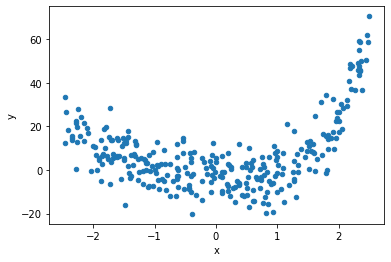

In [11]:
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

## Classification

### Spliting data

In [12]:
X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(X_bc, y_bc, test_size=.2)

### Finding tree depth

In [13]:
def check_depth(depth):
    clfs = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clfs.fit(X_bc_train, y_bc_train)
    preds_train = clfs.predict(X_bc_train)
    preds_test = clfs.predict(X_bc_test)
    f1_train = f1_score(y_bc_train, preds_train)
    f1_test = f1_score(y_bc_test, preds_test)
    f1_dif = f1_train - f1_test
    print(f"""
    {depth}
    train: { f1_train }
    test:  { f1_test }
    train - test : { f1_dif }
          """)
    return f1_dif

In [14]:
res = dict()
for d in range(1, 20):
    res[d] = check_depth(d)

depth = 2


    1
    train: 0.7918968692449355
    test:  0.7076923076923077
    train - test : 0.08420456155262779
          

    2
    train: 0.8396694214876034
    test:  0.7870967741935484
    train - test : 0.052572647294054975
          

    3
    train: 0.8387096774193549
    test:  0.7246376811594202
    train - test : 0.1140719962599347
          

    4
    train: 0.8535714285714286
    test:  0.7246376811594202
    train - test : 0.12893374741200847
          

    5
    train: 0.8846153846153846
    test:  0.7123287671232877
    train - test : 0.17228661749209684
          

    6
    train: 0.9058614564831262
    test:  0.7123287671232877
    train - test : 0.19353268935983847
          

    7
    train: 0.9249999999999999
    test:  0.689655172413793
    train - test : 0.2353448275862069
          

    8
    train: 0.9443447037701975
    test:  0.6993006993006993
    train - test : 0.24504400446949826
          

    9
    train: 0.9630931458699472
    test:  0.676056338028169


### Drawing the tree

In [15]:
file_name = "bc"

In [16]:
clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
clf.fit(X_bc_train, y_bc_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [17]:
str_dot = export_graphviz(clf, out_file=file_name, feature_names=["mean texture", "mean symmetry"], class_names=[str(num) + ", " + name for num, name in zip(set(dbc.target), dbc.target_names)], rounded=True, filled=True)
graph = graphviz.render('dot', "png", file_name)
graph

'bc.png'

In [18]:
f1acc_list = []

In [19]:
clfs = DecisionTreeClassifier(max_depth=depth, random_state=42)
clfs.fit(X_bc_train, y_bc_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [20]:
preds_train = clfs.predict(X_bc_train)
preds_test = clfs.predict(X_bc_test)

In [21]:
f1_train = f1_score(y_bc_train, preds_train)
f1_test = f1_score(y_bc_test, preds_test)

In [22]:
acc_train = accuracy_score(preds_train, y_bc_train)
acc_test = accuracy_score(preds_test, y_bc_test)

In [23]:
f1acc_list.append(depth)
f1acc_list.append(f1_train)
f1acc_list.append(f1_test)
f1acc_list.append(acc_train)
f1acc_list.append(acc_test)
f1acc_list

[2,
 0.8396694214876034,
 0.7870967741935484,
 0.7868131868131868,
 0.7105263157894737]

In [24]:
with open('f1acc_tree.pkl', 'wb') as f:
    pickle.dump(f1acc_list, f, pickle.HIGHEST_PROTOCOL)

## Regression

### Splitting the data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df.x, df.y, test_size=.2)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240,), (60,), (240,), (60,))

In [27]:
def check_depth_reg(depth):
    reg_mod = DecisionTreeRegressor(max_depth=depth, random_state=42)
    reg_mod.fit(X_train.array.reshape(-1, 1), y_train.array.reshape(-1, 1))
    preds_train = reg_mod.predict(X_train.array.reshape(-1, 1))
    preds_test = reg_mod.predict(X_test.array.reshape(-1, 1))
    mse_train = mean_squared_error(y_train, preds_train)
    mse_test = mean_squared_error(y_test, preds_test)
    dif = mse_train - mse_test
    # print(f"""
    # {depth}
    # train: { mse_train }
    # test:  { mse_test }
    # dif:   { dif }
    #       """)

In [28]:
res_reg = []

for d in range(1, 20):
    res_reg.append(check_depth_reg(d))
    
depth = 2

### Drawing the tree

In [29]:
file_name = "reg"

In [30]:
clf = DecisionTreeRegressor(max_depth=depth, random_state=42)
clf.fit(X_bc_train, y_bc_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [31]:
str_dot = export_graphviz(clf, out_file=file_name, feature_names=["mean texture", "mean symmetry"], class_names=[str(num) + ", " + name for num, name in zip(set(dbc.target), dbc.target_names)], rounded=True, filled=True)
graph = graphviz.render('dot', "png", file_name)
graph

'reg.png'

In [32]:
mse_list = []

In [33]:
clfs = DecisionTreeRegressor(max_depth=depth, random_state=42)
clfs.fit(X_train.array.reshape(-1,1), y_train.array.reshape(-1,1))

DecisionTreeRegressor(max_depth=2, random_state=42)

In [34]:
preds_train = clfs.predict(X_train.array.reshape(-1,1))
preds_test = clfs.predict(X_test.array.reshape(-1,1))

In [35]:
mse_train = mean_squared_error(y_train, preds_train)
mse_test = mean_squared_error(y_test, preds_test)

In [36]:
mse_list.append(depth)
mse_list.append(mse_train)
mse_list.append(mse_test)
mse_list

[2, 85.63356350745602, 74.20596611373774]

In [37]:
with open('mse_tree.pkl', 'wb') as f:
    pickle.dump(mse_list, f, pickle.HIGHEST_PROTOCOL)